Sampling from a 100 dimensional Gaussian
==================================

This example demonstrates the ability of the HAGGiS sampler to efficiently sample higher-dimensional posteriors. Obviously this is about the simplest example you could think of, testing on more realistic posteriors may well expose weaknesses in the algorithm.

First we will set up a likelihood function for a 100-D uncorellated Gaussian:

In [1]:
import numpy as np
import haggis
import corner

import matplotlib.pyplot as plt
%matplotlib inline

# Seed the random number generator
np.random.seed(0)

# Set the number of dimensions
n_dim = 100

inv_var = np.ones(n_dim)
        
def lnlike(param):
    """ Log-likelihood for a corellated Gaussian. """
    return -0.5*np.sum(inv_var*param**2)


The sampler is set up to take the same inputs as common nested sampling algorithms. Therefore we must also define the prior transform function which maps numbers from a unit cube onto our prior volume. We'll use a uniform prior from -10 to 10 in each parameter.

In [2]:
def prior_transform(cube, ndim=0, nparam=0):
    return 20.*cube - 10.
        

Now we can set up and run the sampler:

In [3]:
n_steps = 1000

sampler = haggis.gibbs_sampler(lnlike, prior_transform, n_dim)
    
sampler.run(n_steps, verbose=False)

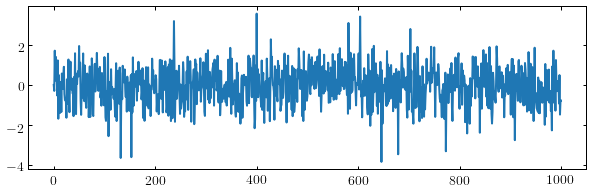

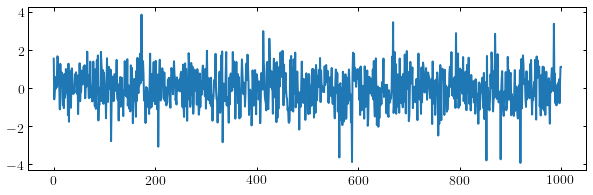

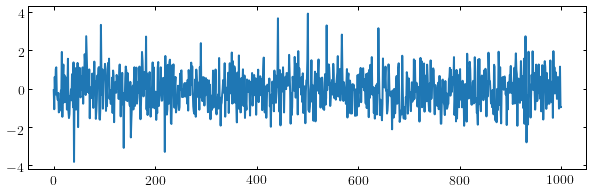

In [4]:
for i in range(3):
    plt.figure(figsize=(10, 3))
    plt.plot(np.arange(n_steps+1), sampler.samples[:, i])
    plt.show()

(1001, 10)


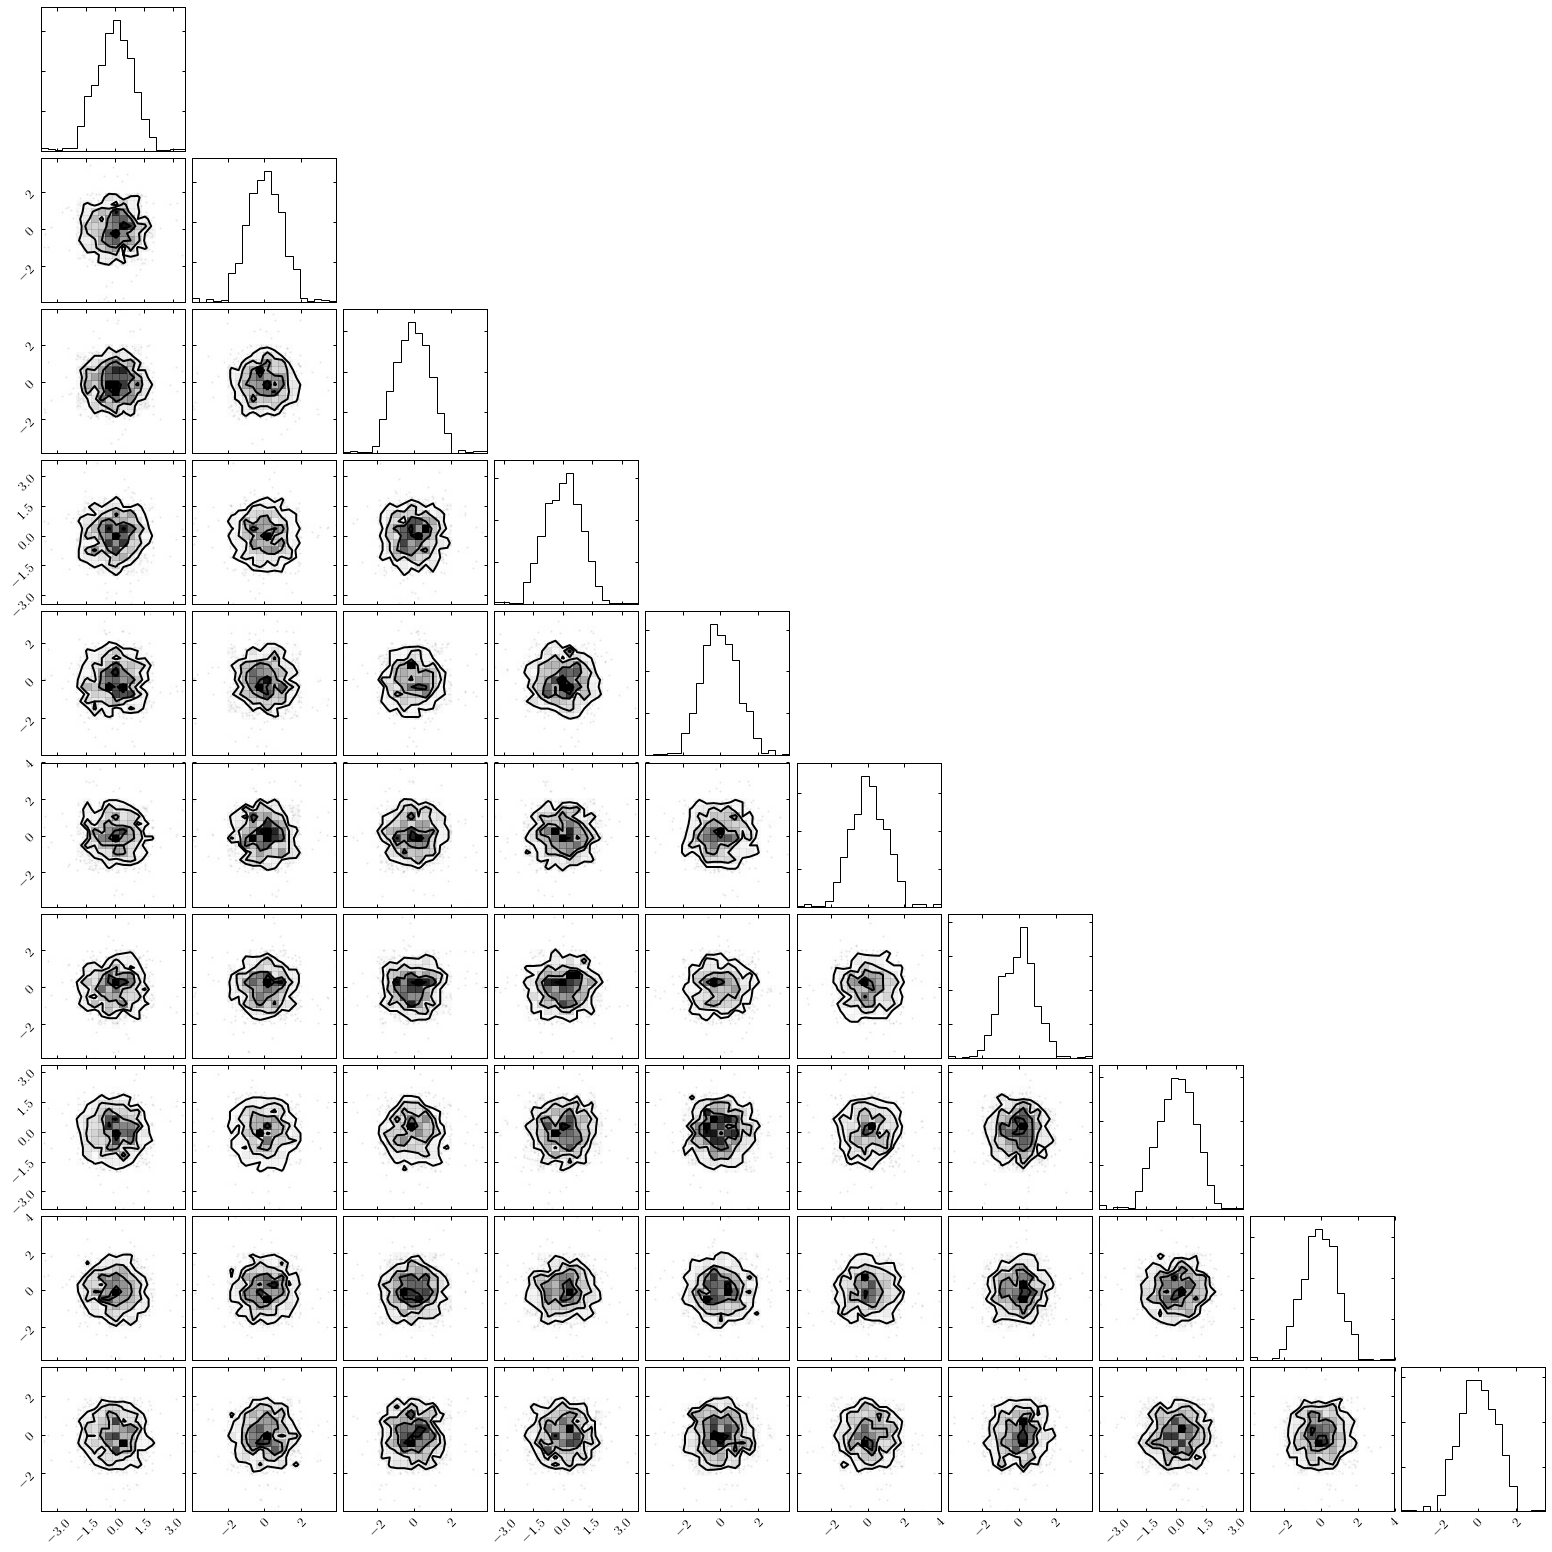

In [5]:
print(sampler.samples[:, :10].shape)
corner.corner(sampler.samples[:, :10])
plt.show()